In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-faces/Humans/1 (2916).jpg
/kaggle/input/human-faces/Humans/1 (607).jpg
/kaggle/input/human-faces/Humans/1 (3767).jpg
/kaggle/input/human-faces/Humans/1 (576).jpg
/kaggle/input/human-faces/Humans/1 (1856).jpg
/kaggle/input/human-faces/Humans/1 (1464).jpg
/kaggle/input/human-faces/Humans/1 (1290).jpg
/kaggle/input/human-faces/Humans/1 (1341).jpg
/kaggle/input/human-faces/Humans/1 (2598).jpg
/kaggle/input/human-faces/Humans/1 (789).jpg
/kaggle/input/human-faces/Humans/1 (882).jpg
/kaggle/input/human-faces/Humans/1 (5469).jpg
/kaggle/input/human-faces/Humans/1 (6466).jpg
/kaggle/input/human-faces/Humans/1 (6835).jpg
/kaggle/input/human-faces/Humans/1 (6027).jpg
/kaggle/input/human-faces/Humans/1 (4288).jpg
/kaggle/input/human-faces/Humans/1 (550).jpg
/kaggle/input/human-faces/Humans/1 (509).jpg
/kaggle/input/human-faces/Humans/1 (2135).jpg
/kaggle/input/human-faces/Humans/1 (3690).jpg
/kaggle/input/human-faces/Humans/1 (3664).jpg
/kaggle/input/human-faces/Humans/1 (6160

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
from torchvision.datasets import ImageFolder
import torchvision.transforms as Transform
import torch
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import torch.nn as model

from tqdm.notebook import tqdm

In [3]:
directory = '/kaggle/input/human-faces'
!ls /kaggle/input/human-faces


Humans


In [4]:
image_size = 64
batch_size = 128
stats = (0.5,0.5,0.5), (0.5,0.5,0.5)

In [5]:
X_train = ImageFolder(directory, transform = Transform.Compose([
    Transform.Resize(image_size),
    Transform.CenterCrop(image_size),
    Transform.ToTensor(),
    Transform.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

In [6]:
data_loader = DataLoader(X_train, batch_size, shuffle = True,num_workers = 2, pin_memory = True)
data_loader

In [7]:
stats[1][0]
def denormalize(tensors):
    return tensors*stats[1][0] + stats[0][0]


In [8]:
def view_images(images, max=64):
    plt.subplots(figsize=(10,10))
    plt.xticks([]), plt.yticks([])
    plt.imshow(make_grid(denormalize(images.detach()[:max]), nrow = 8).permute(1,2,0))
    
def batch(dl, max =5):
    for images, _ in dl:
        view_images(images, max)
        break

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


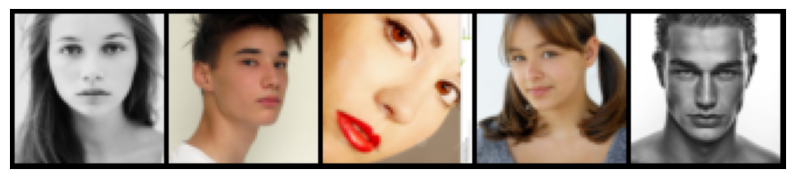

In [9]:
batch(data_loader)

In [10]:
Discriminator = model.Sequential(

    model.Conv2d(3, 64, kernel_size = 4, stride = 2, padding = 1, bias = False),
    model.BatchNorm2d(64),
    model.ReLU(inplace=True), # output = 64 x 32 x32 
    
    model.Conv2d(64, 128, kernel_size = 4, stride = 2, padding = 1, bias = False),
    model.BatchNorm2d(128),
    model.ReLU(inplace=True), # output = 128 x 16 x 16 
    
    model.Conv2d(128, 256, kernel_size = 4, stride = 2, padding = 1, bias = False),
    model.BatchNorm2d(256),
    model.ReLU(inplace=True), # output = 256 x 8 x 8
    
    model.Conv2d(256, 512, kernel_size = 4, stride = 2, padding = 1, bias = False),
    model.BatchNorm2d(512),
    model.ReLU( inplace=True), # output = 512 x 4 x 4
    
    model.Conv2d(512, 1, kernel_size=4, stride = 1, padding=0, bias=False),
    # out = 1 x 1 x 1
    model.Flatten(),
    model.Sigmoid()
    
)

In [11]:
latent_size = 128

In [12]:
generator = model.Sequential(
    # input shape = 128 x 1 x 1
    model.ConvTranspose2d(latent_size, 512, kernel_size = 4, stride=1, padding = 0, bias=False),
    model.BatchNorm2d(512),
    model.ReLU(inplace=True), #output shape = 512 x 4 x 4
    
    model.ConvTranspose2d(512, 256, kernel_size = 4, stride=2, padding = 1, bias=False),
    model.BatchNorm2d(256),
    model.ReLU(inplace=True), #output shape = 256 x 8 x 8
    
    model.ConvTranspose2d(256, 128, kernel_size = 4, stride=2, padding = 1, bias=False),
    model.BatchNorm2d(128),
    model.ReLU(inplace=True), #output shape = 128 x 16 x 16
    
    model.ConvTranspose2d(128, 64, kernel_size = 4, stride=2, padding = 1, bias=False),
    model.BatchNorm2d(64),
    model.ReLU(inplace=True), #output shape = 64 x 32 x 32
    
    model.ConvTranspose2d(64, 3, kernel_size = 4, stride=2, padding = 1, bias=False),
    model.Tanh()
    # output shape = 3 x 64 x 64
    
)


In [13]:

torch.randn(2,3,6,7)

tensor([[[[-6.9365e-01,  2.5008e-01,  1.4812e-01, -1.6815e-01,  8.0540e-01,
           -1.2086e+00,  1.0772e+00],
          [-7.4055e-01,  6.3313e-01, -7.5486e-01, -2.4346e-01, -2.5289e-01,
            4.5935e-01,  1.3711e+00],
          [-1.3654e-01,  8.9290e-01, -6.8559e-01, -8.2359e-01,  1.0110e+00,
           -3.1815e-01, -2.8698e-01],
          [-1.1280e+00, -1.6764e+00,  3.4706e-01, -1.2111e+00,  8.0249e-01,
           -6.0362e-02, -5.1665e-01],
          [-1.3287e-01, -1.9392e+00,  5.8063e-01,  1.1879e-01,  1.0515e+00,
           -9.1585e-01, -4.6797e-01],
          [ 1.2071e+00,  2.4994e+00,  7.7594e-01, -1.1017e+00,  2.9483e-01,
           -1.1657e+00, -5.4931e-01]],

         [[ 7.9000e-01, -7.5489e-01,  1.7389e+00,  7.7887e-01,  1.1605e+00,
           -8.0978e-01,  1.3248e+00],
          [-3.0423e-01,  1.9385e-03,  5.7744e-01,  9.9356e-01,  2.7136e-01,
           -1.1707e+00, -2.1925e+00],
          [-1.9389e+00, -3.8339e-01,  1.0662e+00,  6.4881e-01,  1.1281e-01,
          

new images torch.Size([128, 128, 1, 1])
fake images torch.Size([128, 3, 64, 64])


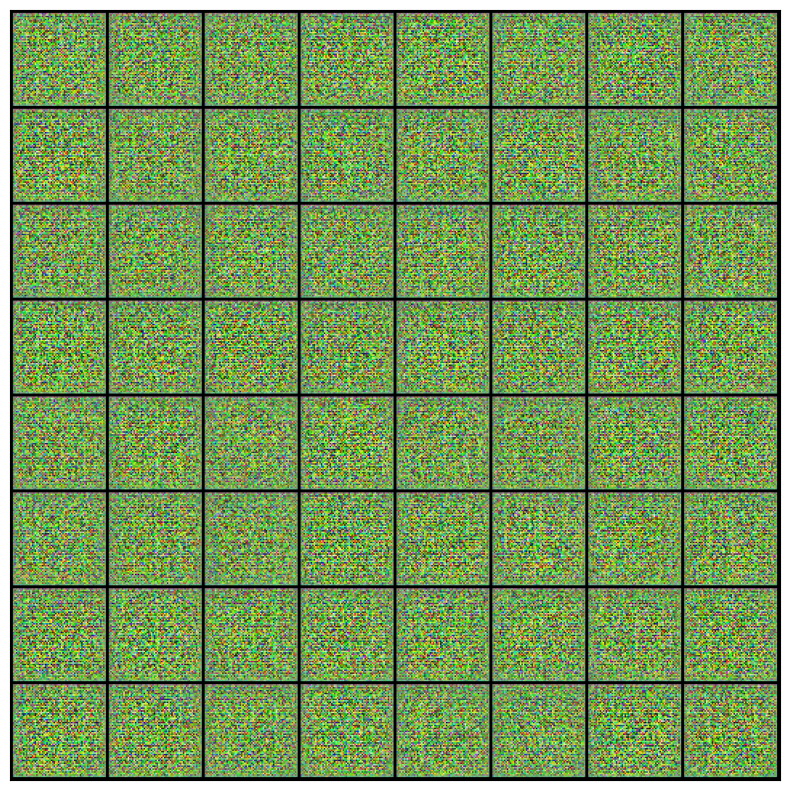

In [14]:
# Let generate some output image using generator by transforming and denormalizing (so that we can plot ) the output .
new = torch.randn(batch_size, latent_size, 1,1) # random latent tensors of size (batch_size x latent size x 1 x 1)
print("new images",new.shape)
#Now the generator is given a tensor value to generate a Fake Image
fake_images = generator(new)
print("fake images",fake_images.shape)
view_images(fake_images)

In [15]:
import torch.nn.functional as F

In [16]:
def discriminator_t(real_images, opt_d):
    opt_d.zero_grad()
    real_preds = Discriminator(real_images) 
    real_targets = torch.ones(real_images.size(0), 1)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()
    

    latent = torch.randn(batch_size, latent_size, 1, 1)
    fake_images = generator(latent)


    fake_targets = torch.zeros(fake_images.size(0), 1)
    fake_preds = Discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score


In [17]:
def generator_t(opt_g):

    opt_g.zero_grad()
   
    latent = torch.randn(batch_size, latent_size, 1, 1)
    fake_images = generator(latent)
    

    gen_preds = Discriminator(fake_images)
    gen_targets = torch.ones(batch_size, 1)
    loss = F.binary_cross_entropy(gen_preds, gen_targets)
    

    loss.backward()
    opt_g.step()
    
    return loss.item()

In [18]:
from torchvision.utils import save_image
sample_dir = 'New_Generated_Images'
os.makedirs(sample_dir, exist_ok=True) 

In [19]:
latent = torch.randn(1, latent_size, 1,1)
fake = generator(latent)
fake.shape

torch.Size([1, 3, 64, 64])

In [20]:
def save_samples(index, latent_tensors, show= True):
    fake_images = generator(latent_tensors) 
    fake_names = 'generated-images-{0:0=3d}.png'.format(index) 
    save_image(denormalize(fake_images), os.path.join(sample_dir, fake_names), nrow = 8) 
    print('Saving', fake_names)
    if show:
        plt.subplots(figsize=(8,8))
        plt.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1,2,0))

Saving generated-images-000.png


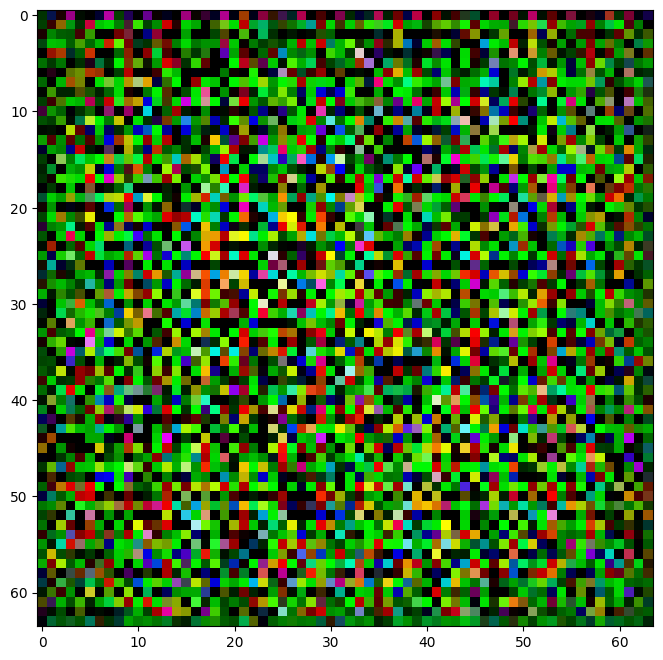

In [21]:
'''
fixed_latent = torch.randn(64, latent_size, 1, 1)
save_samples(0, fixed_latent)
'''
fixed_latent = torch.randn(1, latent_size, 1, 1)
save_samples(0, fixed_latent)

In [22]:
def fit(epochs, learning_rate, start_index=1):
    torch.cuda.empty_cache()
    
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []

    opt_d = torch.optim.Adam(Discriminator.parameters(), lr = learning_rate, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr = learning_rate, betas = (0.5, 0.999))

   
    for epoch in range(epochs):
        for real_images,_ in tqdm(data_loader): 
            loss_d, real_score, fake_score = discriminator_t(real_images, opt_d)
            loss_g = generator_t(opt_g)

        losses_d.append(loss_d)
        losses_g.append(loss_g)
        real_scores.append(real_score)
        fake_scores.append(fake_score)
     
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))
  
    return losses_g, losses_d, fake_scores, real_scores

In [23]:
learning_rate = 0.0004
epochs = 5
history = fit(epochs, learning_rate)

  0%|          | 0/57 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/5], loss_g: 11.5503, loss_d: 0.0828, real_score: 0.9284, fake_score: 0.0001


  0%|          | 0/57 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [2/5], loss_g: 2.7603, loss_d: 0.4720, real_score: 0.7173, fake_score: 0.0520


  0%|          | 0/57 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [3/5], loss_g: 2.3732, loss_d: 2.1629, real_score: 0.2063, fake_score: 0.0134


  0%|          | 0/57 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [4/5], loss_g: 4.0161, loss_d: 0.4637, real_score: 0.8517, fake_score: 0.2344


  0%|          | 0/57 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [5/5], loss_g: 4.0739, loss_d: 0.6333, real_score: 0.8690, fake_score: 0.3584


In [24]:
losses_g, losses_d, real_scores, fake_scores = history
torch.save(generator.state_dict(), 'G.pth')
torch.save(Discriminator.state_dict(), 'D.pth')

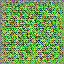

In [25]:
from IPython.display import Image
Image('/kaggle/working/New_Generated_Images/generated-images-000.png')

In [26]:
real_scores


[5.1747359975706786e-05,
 0.05199173465371132,
 0.013363461941480637,
 0.23438188433647156,
 0.35838228464126587]